In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
pd.set_option("display.max_row", 500)
pd.set_option("display.max_columns", 150)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.precision', 2)

pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#Sales
channel_df = pd.read_csv('Dragonyte_project/Data/Channel_Volume.csv')

In [4]:
#Market size TAM SAM
ms_df = pd.read_csv('Dragonyte_project/Data/Market_Sizes.csv')

In [5]:
#Global Business Operations
gbo_df = pd.read_csv('Dragonyte_project/Data/Company_Share_GBO_unit.csv', delimiter=';')

 Data cleaning and modelling

• Provide an environment (Database if possible) to connect Tableau to

• Answer the following questions

• What Categories/Subcategories are projected to grow the fastest in the next 5 years?

• Within these Categories/Subcategories, what Channels are growing?

• What is Dragonyte’s market position within these fast-growing categories?

• Provide predictions + explanation of the model used

• Give your recommendations to the Dragonyte Board

• Think out of the box! Dare to surprise!

In [6]:
gbo_df.shape

(43336, 11)

In [7]:
ms_df.shape

(1221, 15)

In [8]:
channel_df.shape

(8468, 13)

In [9]:
gbo_df

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,"35506,37732"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Heineken NV,million litres,2016.00,"Saturday, 31 Dec 2016",4.00,"18482,5958"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43331,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Rosspirtprom FGUP,000 litres,2016.00,31 12 2016,4.00,"3,708013795"
43332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43333,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Private Label,000 litres,2016.00,31-12-16,4.00,"307,7663666"
43334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(gbo_df.dtypes)


Location              float64
Industry               object
Subcategory_ID        float64
Hierarchy_Level       float64
Data_Type              object
Global_Brand_Owner     object
Unit                   object
Year_text             float64
Year_date              object
Year_minus_2016       float64
Volume                 object
dtype: object


In [11]:
gbo_df.isnull().count()

Location              43336
Industry              43336
Subcategory_ID        43336
Hierarchy_Level       43336
Data_Type             43336
Global_Brand_Owner    43336
Unit                  43336
Year_text             43336
Year_date             43336
Year_minus_2016       43336
Volume                43336
dtype: int64

In [12]:
print(gbo_df.isnull().sum())


Location              21668
Industry              21668
Subcategory_ID        21668
Hierarchy_Level       21668
Data_Type             21668
Global_Brand_Owner    21668
Unit                  21668
Year_text             21668
Year_date             21668
Year_minus_2016       21668
Volume                21668
dtype: int64


In [13]:
print(gbo_df.duplicated().sum())


21667


In [14]:
gbo_df.drop_duplicates(inplace=True)


In [15]:
print(gbo_df.isnull().sum())

Location              1
Industry              1
Subcategory_ID        1
Hierarchy_Level       1
Data_Type             1
Global_Brand_Owner    1
Unit                  1
Year_text             1
Year_date             1
Year_minus_2016       1
Volume                1
dtype: int64


In [16]:
gbo_df = gbo_df.dropna()


In [17]:
gbo_df

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
1,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,"35506,37732"
3,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Heineken NV,million litres,2016.00,"Saturday, 31 Dec 2016",4.00,"18482,5958"
5,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Carlsberg A/S,million litres,2016.00,31-12-16,4.00,"11121,69868"
7,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Dragonyte Brewery,million litres,2016.00,31-Dec-16,4.00,"6252,38259"
9,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016.00,31 12 2016,4.00,"7834,494901"
...,...,...,...,...,...,...,...,...,...,...,...
43327,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Central European Distribution Corp (CEDC),000 litres,2016.00,"Saturday, 31 Dec 2016",4.00,"223,0247261"
43329,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Hubei Zhijiang Distillery Co Ltd,000 litres,2016.00,31 12 2016,4.00,"78,55588126"
43331,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Rosspirtprom FGUP,000 litres,2016.00,31 12 2016,4.00,"3,708013795"
43333,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Private Label,000 litres,2016.00,31-12-16,4.00,"307,7663666"


In [18]:
print(gbo_df.dtypes)


Location              float64
Industry               object
Subcategory_ID        float64
Hierarchy_Level       float64
Data_Type              object
Global_Brand_Owner     object
Unit                   object
Year_text             float64
Year_date              object
Year_minus_2016       float64
Volume                 object
dtype: object


In [20]:
gbo_df['Volume'] = gbo_df['Volume'].str.replace(',', '.').astype(float)


In [21]:
gbo_df

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
1,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,35506.38
3,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Heineken NV,million litres,2016.00,"Saturday, 31 Dec 2016",4.00,18482.60
5,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Carlsberg A/S,million litres,2016.00,31-12-16,4.00,11121.70
7,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Dragonyte Brewery,million litres,2016.00,31-Dec-16,4.00,6252.38
9,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016.00,31 12 2016,4.00,7834.49
...,...,...,...,...,...,...,...,...,...,...,...
43329,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Hubei Zhijiang Distillery Co Ltd,000 litres,2016.00,31 12 2016,4.00,78.56
43331,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Rosspirtprom FGUP,000 litres,2016.00,31 12 2016,4.00,3.71
43333,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Private Label,000 litres,2016.00,31-12-16,4.00,307.77
43335,8.00,Alcoholic Drinks,15.00,1.00,Total Volume,Others,000 litres,2016.00,31-Dec-16,4.00,8263.55


In [25]:
print(gbo_df.dtypes)


Location              float64
Industry               object
Subcategory_ID        float64
Hierarchy_Level       float64
Data_Type              object
Global_Brand_Owner     object
Unit                   object
Year_text             float64
Year_date              object
Year_minus_2016       float64
Volume                float64
dtype: object


In [26]:
numerical=gbo_df.select_dtypes(include=np.number)


In [27]:
numerical

,Location,Subcategory_ID,Hierarchy_Level,Year_text,Year_minus_2016,Volume
1,8.00,13.00,1.00,2016.00,4.00,35506.38
3,8.00,13.00,1.00,2016.00,4.00,18482.60
5,8.00,13.00,1.00,2016.00,4.00,11121.70
7,8.00,13.00,1.00,2016.00,4.00,6252.38
9,8.00,13.00,1.00,2016.00,4.00,7834.49
...,...,...,...,...,...,...
43329,8.00,15.00,1.00,2016.00,4.00,78.56
43331,8.00,15.00,1.00,2016.00,4.00,3.71
43333,8.00,15.00,1.00,2016.00,4.00,307.77
43335,8.00,15.00,1.00,2016.00,4.00,8263.55


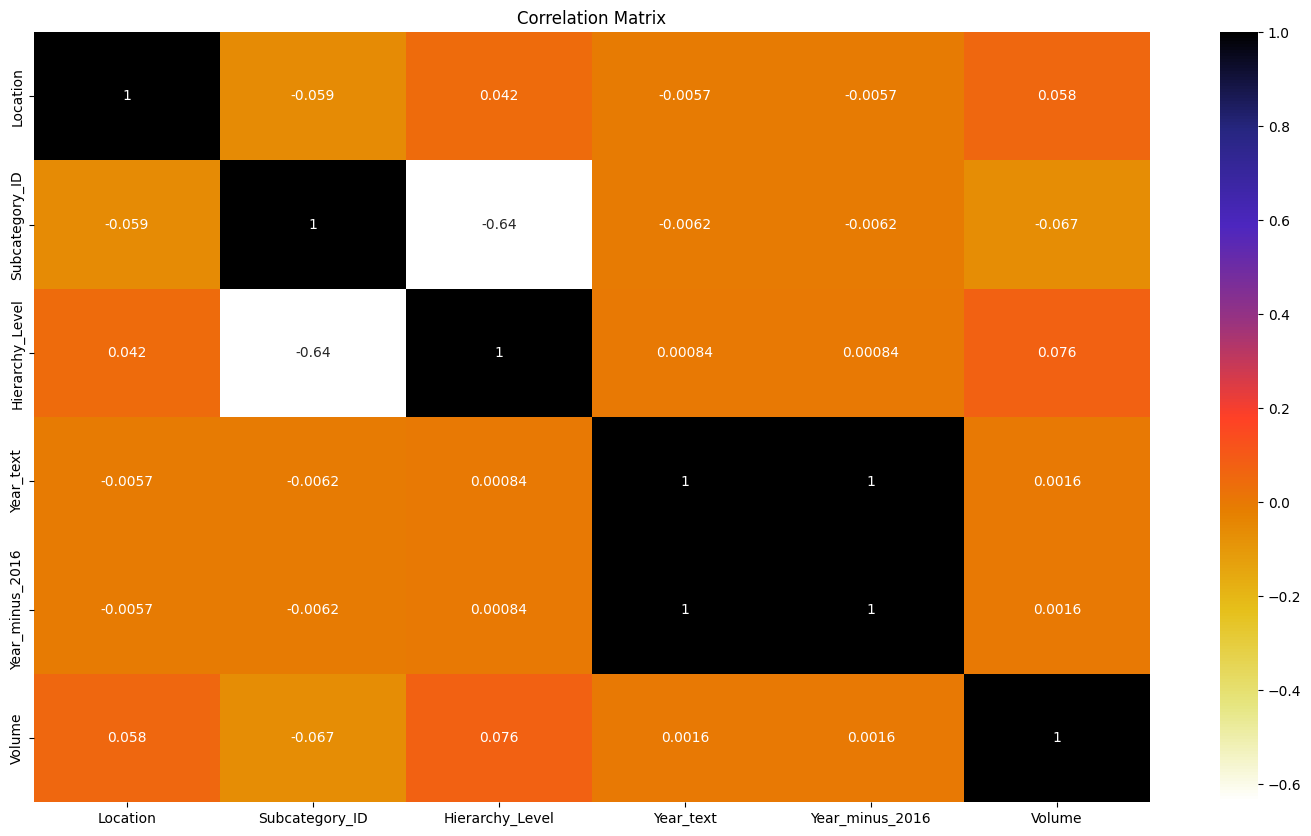

In [28]:
# Calculate the correlation matrix
cor = numerical.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Matrix')
plt.show()

In [33]:
gbo_df.head(10)

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
1,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,35506.38
3,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Heineken NV,million litres,2016.00,"Saturday, 31 Dec 2016",4.00,18482.60
5,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Carlsberg A/S,million litres,2016.00,31-12-16,4.00,11121.70
7,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Dragonyte Brewery,million litres,2016.00,31-Dec-16,4.00,6252.38
9,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016.00,31 12 2016,4.00,7834.49
11,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Asahi Group Holdings Ltd,million litres,2016.00,31 12 2016,4.00,2446.94
13,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Beijing Yanjing Brewery Co Ltd,million litres,2016.00,31 12 2016,4.00,5373.66
15,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Kirin Holdings Co Ltd,million litres,2016.00,"Sat, 31 December 2016",4.00,4770.92
17,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Diageo Plc,million litres,2016.00,31-Dec-16,4.00,1926.57
19,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,San Miguel Corp,million litres,2016.00,31-12-16,4.00,1549.13


In [35]:
gbo_df['Unit'].unique()

array(['million litres', '000 litres', nan], dtype=object)